In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images.astype('float32') / 255.0
test_images =test_images.astype('float32') / 255.0

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

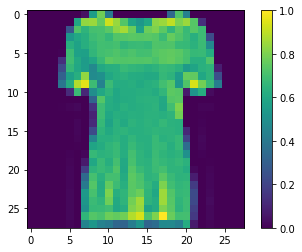

In [5]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

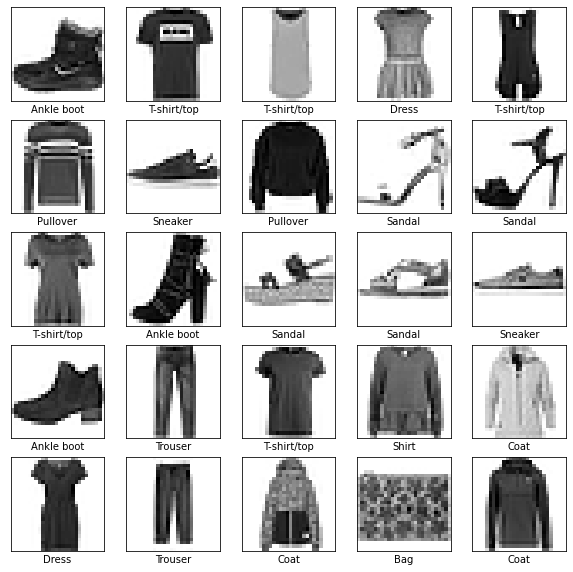

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
val_images, train_images= train_images[:3000], train_images[3000:] 
val_labels, train_labels = train_labels[:3000], train_labels[3000:]

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
       tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_images
                    ,train_labels
                    ,epochs=10
                    ,batch_size=512
                    ,validation_data=(val_images,val_labels)
                                                                                                                              
                   )

Epoch 1/10
112/112 [==============================] - 4s 7ms/step - loss: 1.2609 - accuracy: 0.5929 - val_loss: 0.5059 - val_accuracy: 0.8383
Epoch 2/10
112/112 [==============================] - 0s 4ms/step - loss: 0.4767 - accuracy: 0.8347 - val_loss: 0.4291 - val_accuracy: 0.8533
Epoch 3/10
112/112 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.8532 - val_loss: 0.4095 - val_accuracy: 0.8633
Epoch 4/10
112/112 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.8622 - val_loss: 0.3819 - val_accuracy: 0.8677
Epoch 5/10
112/112 [==============================] - 0s 3ms/step - loss: 0.3642 - accuracy: 0.8732 - val_loss: 0.3966 - val_accuracy: 0.8620
Epoch 6/10
112/112 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8780 - val_loss: 0.3644 - val_accuracy: 0.8733
Epoch 7/10
112/112 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.8830 - val_loss: 0.3485 - val_accuracy: 0.8753
Epoch 

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3610 - accuracy: 0.8730

Test accuracy: 0.8730000257492065


In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

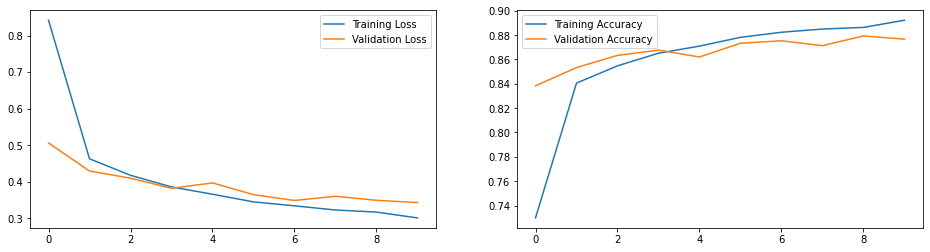

In [15]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [16]:
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3610 - accuracy: 0.8730
0.3609609007835388
0.8730000257492065


In [17]:
predictions = model.predict(test_images)

In [18]:
print(predictions)

[[ -3.2521863   -7.2623563   -1.4077265  ...   5.977085    -0.09728324
    7.9900475 ]
 [  5.844903    -1.8158016   14.353128   ...  -6.749399     1.1714153
   -5.121449  ]
 [  7.6503825   17.425573     1.3648325  ... -14.826719     2.8609583
   -8.57315   ]
 ...
 [  1.8670182   -2.282218    -0.48240125 ...   0.05552543   6.4416313
   -1.4243695 ]
 [  4.796099    13.88264     -1.5155531  ... -11.037401     1.4083972
   -6.1059422 ]
 [  0.6870724   -0.95205927   0.83805877 ...   4.1336656    1.4784018
   -1.4074572 ]]


In [19]:
import numpy as np

print(np.argmax(predictions[0]))

9


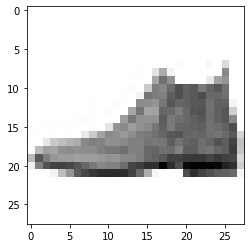

In [20]:
plt.imshow(test_images[0],cmap=plt.cm.binary)
plt.show()

In [21]:
pred_classes = np.argmax(model.predict(train_images), axis=-1)
pred_classes

array([6, 3, 2, ..., 3, 0, 5])

In [22]:
conf_mx = tf.math.confusion_matrix(train_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[5111,   19,   52,   75,    9,   10,  384,    0,   57,    1],
       [  36, 5543,    4,   76,    5,    1,    4,    0,    9,    1],
       [  93,    4, 4821,   39,  334,    0,  376,    0,   43,    0],
       [ 223,   38,   38, 5010,  189,    2,  147,    0,   41,    0],
       [  14,    9,  579,  125, 4512,    0,  407,    0,   50,    1],
       [   2,    0,    0,    1,    0, 5580,    2,   81,    4,   30],
       [ 854,    5,  369,   97,  253,    1, 4061,    0,   62,    0],
       [   0,    0,    0,    0,    0,  111,    0, 5483,    8,   86],
       [   8,    5,   15,    9,   14,   12,   31,   15, 5603,    1],
       [   1,    0,    0,    0,    1,   25,    0,  213,    1, 5464]],
      dtype=int32)>

In [23]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

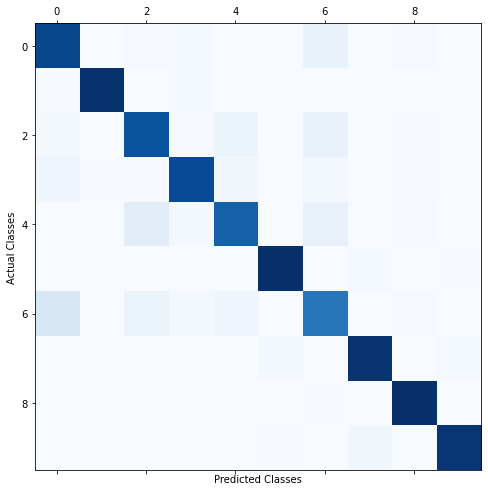

In [24]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()